In [1]:
from svgpathtools import svg2paths, Path, Line, CubicBezier, QuadraticBezier, Arc
import numpy as np
import csv
from collections import defaultdict
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def extract_points_from_path(path_segment, num_samples=100):
    if isinstance(path_segment, (Line, CubicBezier, QuadraticBezier, Arc)):
        return [path_segment.point(t) for t in np.linspace(0, 1, num_samples)]
    return []

In [3]:
svg_file = './data/problems/frag0.svg' 
paths, _ = svg2paths(svg_file)

all_points = []
for curve_index, path in enumerate(paths):
    for segment in path:
        points = extract_points_from_path(segment)
        all_points.extend([(curve_index, 0.0000, float(p.real), float(p.imag)) for p in points])

with open('out.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['index', 'constant', 'x', 'y'])
    for index, constant, x, y in all_points:
        writer.writerow([index, constant, np.float64(x), np.float64(y)])

In [4]:
curves = defaultdict(list)
with open('out.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  
    for row in reader:
        try:
            curve_no = int(float(row[0])) 
            x = float(row[2])
            y = float(row[3])
            curves[curve_no].append((x, y))
        except ValueError as e:
            print(f"Skipping line due to error: {e}")

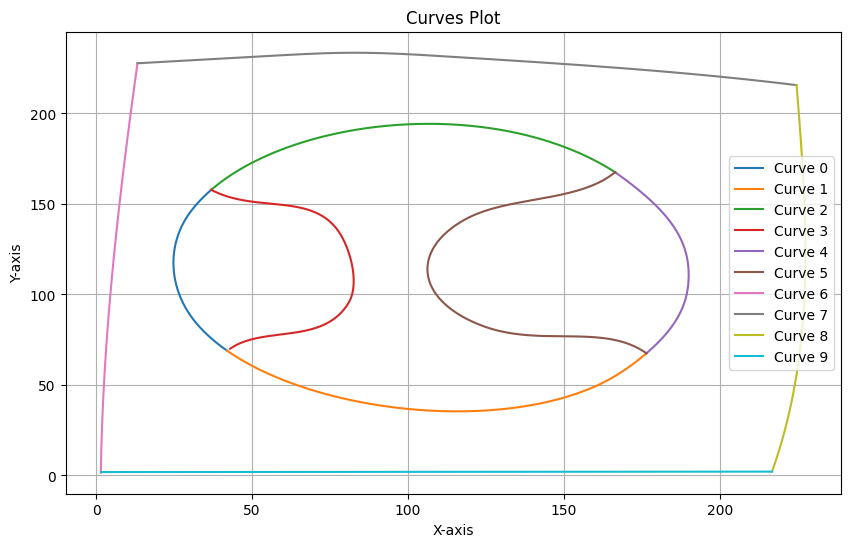

In [5]:
plt.figure(figsize=(10, 6))

for index, points in curves.items():
    x_values, y_values = zip(*points)  # Unpack the list of tuples into two lists: x_values and y_values
    plt.plot(x_values, y_values, label=f'Curve {index}')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Curves Plot')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
curves

defaultdict(list,
            {0: [(41.942, 68.98),
              (41.81014896026895, 69.13892342154325),
              (41.678717852950484, 69.29817831204609),
              (41.54770787767482, 69.45776433759079),
              (41.41712023407218, 69.61768116425968),
              (41.286956121772775, 69.77792845813508),
              (41.157216740406824, 69.93850588529928),
              (41.027903289604545, 70.09941311183461),
              (40.89901696899616, 70.26064980382336),
              (40.770558978211874, 70.42221562734787),
              (40.64253051688191, 70.58411024849042),
              (40.51493278463649, 70.74633333333334),
              (40.38776698110583, 70.90888454795893),
              (40.261034305920134, 71.07176355844952),
              (40.13473595870963, 71.2349700308874),
              (40.008873139104544, 71.39850363135487),
              (39.88344704673508, 71.56236402593429),
              (39.758458881231455, 71.72655088070792),
              (39.63390

In [7]:
import math

def point_line_distance(point, start, end):
    """Calculate the perpendicular distance from a point to a line."""
    if start == end:
        return math.dist(point, start)
    else:
        n = abs((end[1] - start[1]) * point[0] - (end[0] - start[0]) * point[1] + end[0] * start[1] - end[1] * start[0])
        d = math.sqrt((end[1] - start[1]) ** 2 + (end[0] - start[0]) ** 2)
        return n / d

def ramer_douglas_peucker(points, epsilon):
    """Simplify a curve with the Ramer-Douglas-Peucker algorithm."""
    # Find the point with the maximum distance
    dmax = 0.0
    index = 0
    end = len(points)
    for i in range(1, end - 1):
        d = point_line_distance(points[i], points[0], points[-1])
        if d > dmax:
            index = i
            dmax = d
    
    # If max distance is greater than epsilon, recursively simplify
    if dmax > epsilon:
        # Recursive call
        rec_results1 = ramer_douglas_peucker(points[:index+1], epsilon)
        rec_results2 = ramer_douglas_peucker(points[index:], epsilon)
        
        # Build the result list
        result = rec_results1[:-1] + rec_results2
    else:
        result = [points[0], points[-1]]
    
    return result

def simplify_curves(curves, epsilon):
    """Simplify all curves in a dictionary using the Ramer-Douglas-Peucker algorithm."""
    simplified_curves = {}
    for index, points in curves.items():
        simplified_curves[index] = ramer_douglas_peucker(points, epsilon)
    return simplified_curves

epsilon = 1.0
simplified_curves = simplify_curves(curves, epsilon)
simplified_curves

{0: [(41.942, 68.98),
  (29.961169872379546, 89.02338530288087),
  (24.91430727023319, 112.62153223593964),
  (27.209917885105494, 136.88305719164916),
  (36.89100000000002, 157.80800000000002)],
 1: [(176.5, 67.5),
  (164.715692740073, 53.218744716834706),
  (151.48993784596294, 43.74154998819951),
  (133.8674307270233, 37.33333607681756),
  (114.70817735770106, 35.41459262763334),
  (95.06009492640925, 37.70259570709648),
  (74.74404719266943, 44.46135223884598),
  (56.33590085427268, 55.34165233603251),
  (41.941999999999894, 68.98000000000002)],
 2: [(36.891, 157.808),
  (48.36266441272227, 171.29351019840274),
  (63.655899453673555, 182.66043734147925),
  (81.10363642856481, 190.34020984665548),
  (99.85842524417731, 194.00945198541888),
  (119.07281580729239, 193.34478802925688),
  (136.48421876246394, 188.60492946194924),
  (152.8986049382716, 179.642392318244),
  (166.49999999999997, 167.4999999999998)],
 3: [(42.964, 70.031),
  (49.56138241923366, 75.05938467317807),
  (67.757

In [8]:
import math

def distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

def midpoint(point1, point2):
    """Calculate the midpoint between two points."""
    return ((point1[0] + point2[0]) / 2, (point1[1] + point2[1]) / 2)

def round_point(point):
    """Round the coordinates of a point to one decimal place."""
    return (round(point[0], 1), round(point[1], 1))

def update_endpoints_with_midpoints(curves, threshold=1.0):
    """Update endpoints with midpoints if they are very close to each other."""
    endpoints = {}
    updated_curves = {k: v[:] for k, v in curves.items()}  # Create a copy of the curves dictionary

    # Extract endpoints
    for key, points in curves.items():
        endpoints[key] = (points[0], points[-1])

    # Find and update close endpoints
    for key1, (start1, end1) in endpoints.items():
        for key2, (start2, end2) in endpoints.items():
            if key1 < key2:
                if distance(start1, start2) < threshold:
                    mid = midpoint(start1, start2)
                    updated_curves[key1][0] = mid
                    updated_curves[key2][0] = mid
                if distance(start1, end2) < threshold:
                    mid = midpoint(start1, end2)
                    updated_curves[key1][0] = mid
                    updated_curves[key2][-1] = mid
                if distance(end1, start2) < threshold:
                    mid = midpoint(end1, start2)
                    updated_curves[key1][-1] = mid
                    updated_curves[key2][0] = mid
                if distance(end1, end2) < threshold:
                    mid = midpoint(end1, end2)
                    updated_curves[key1][-1] = mid
                    updated_curves[key2][-1] = mid

    # Round all point values in the resulting dictionary
    for key, points in updated_curves.items():
        updated_curves[key] = [round_point(point) for point in points]

    return updated_curves

threshold = 5.0

updated_curves = update_endpoints_with_midpoints(simplified_curves, threshold)
updated_curves


{0: [(42.5, 69.5), (30.0, 89.0), (24.9, 112.6), (27.2, 136.9), (36.9, 157.8)],
 1: [(176.5, 67.5),
  (164.7, 53.2),
  (151.5, 43.7),
  (133.9, 37.3),
  (114.7, 35.4),
  (95.1, 37.7),
  (74.7, 44.5),
  (56.3, 55.3),
  (42.5, 69.5)],
 2: [(36.9, 157.8),
  (48.4, 171.3),
  (63.7, 182.7),
  (81.1, 190.3),
  (99.9, 194.0),
  (119.1, 193.3),
  (136.5, 188.6),
  (152.9, 179.6),
  (166.5, 167.5)],
 3: [(42.5, 69.5),
  (49.6, 75.1),
  (67.8, 80.2),
  (75.1, 85.1),
  (81.4, 96.7),
  (82.4, 112.3),
  (78.8, 132.0),
  (72.3, 143.6),
  (64.5, 148.3),
  (44.9, 152.8),
  (36.9, 157.8)],
 4: [(166.5, 167.5),
  (183.0, 142.7),
  (187.4, 131.0),
  (189.7, 118.8),
  (189.8, 104.4),
  (187.8, 91.8),
  (183.5, 79.7),
  (176.5, 67.5)],
 5: [(176.5, 67.5),
  (171.3, 72.4),
  (164.5, 75.4),
  (136.6, 77.8),
  (124.7, 82.2),
  (117.4, 87.8),
  (111.9, 94.6),
  (108.3, 102.1),
  (106.4, 110.6),
  (108.7, 127.2),
  (118.5, 141.6),
  (128.6, 148.1),
  (155.5, 158.0),
  (166.5, 167.5)],
 6: [(13.2, 227.8), (4.8, 1

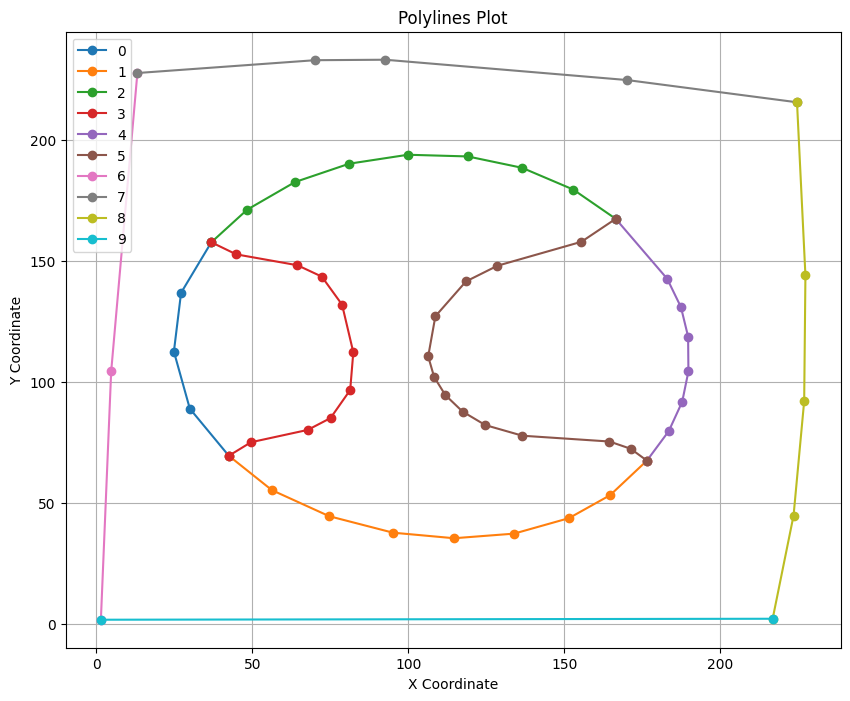

In [9]:
plt.figure(figsize=(10, 8))

for label, points in updated_curves.items():
    xs, ys = zip(*points)  # Unzip the list of points into x and y coordinates
    plt.plot(xs, ys, marker='o', label=label)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Polylines Plot')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from collections import defaultdict

# Initialize adjacency list as a defaultdict of lists
adj_list = defaultdict(list)

# Given polylines


# Populate the adjacency list
for polyline in updated_curves.values():
    for i in range(len(polyline) - 1):
        start, end = polyline[i], polyline[i+1]
        adj_list[start].append(end)
        adj_list[end].append(start)

# Convert to a regular dictionary for a nicer display
adj_list = dict(adj_list)
adj_list

{(42.5, 69.5): [(30.0, 89.0), (56.3, 55.3), (49.6, 75.1)],
 (30.0, 89.0): [(42.5, 69.5), (24.9, 112.6)],
 (24.9, 112.6): [(30.0, 89.0), (27.2, 136.9)],
 (27.2, 136.9): [(24.9, 112.6), (36.9, 157.8)],
 (36.9, 157.8): [(27.2, 136.9), (48.4, 171.3), (44.9, 152.8)],
 (176.5, 67.5): [(164.7, 53.2), (183.5, 79.7), (171.3, 72.4)],
 (164.7, 53.2): [(176.5, 67.5), (151.5, 43.7)],
 (151.5, 43.7): [(164.7, 53.2), (133.9, 37.3)],
 (133.9, 37.3): [(151.5, 43.7), (114.7, 35.4)],
 (114.7, 35.4): [(133.9, 37.3), (95.1, 37.7)],
 (95.1, 37.7): [(114.7, 35.4), (74.7, 44.5)],
 (74.7, 44.5): [(95.1, 37.7), (56.3, 55.3)],
 (56.3, 55.3): [(74.7, 44.5), (42.5, 69.5)],
 (48.4, 171.3): [(36.9, 157.8), (63.7, 182.7)],
 (63.7, 182.7): [(48.4, 171.3), (81.1, 190.3)],
 (81.1, 190.3): [(63.7, 182.7), (99.9, 194.0)],
 (99.9, 194.0): [(81.1, 190.3), (119.1, 193.3)],
 (119.1, 193.3): [(99.9, 194.0), (136.5, 188.6)],
 (136.5, 188.6): [(119.1, 193.3), (152.9, 179.6)],
 (152.9, 179.6): [(136.5, 188.6), (166.5, 167.5)],
 (

In [11]:
from collections import defaultdict

def find_cycles(graph):
    def dfs(node, start, visited, path):
        visited[node] = True
        path.append(node)
        
        for neighbor in graph[node]:
            if neighbor == start and len(path) > 2:
                # Found a cycle
                cycle = path[:] + [start]
                cycles.append(cycle)
            elif not visited[neighbor]:
                dfs(neighbor, start, visited, path)
        
        path.pop()
        visited[node] = False

    cycles = []
    visited = defaultdict(bool)
    
    for node in graph:
        if not visited[node]:
            dfs(node, node, visited, [])
    
    unique_cycles = []
    for cycle in cycles:
        cycle_set = set(cycle)
        if all(cycle_set != set(c) for c in unique_cycles):
            unique_cycles.append(cycle)
    
    return unique_cycles


# Finding unique cycles
unique_cycles = find_cycles(adj_list)

# Display the unique cycles
for cycle in unique_cycles:
    print(cycle)
unique_cycles

[(42.5, 69.5), (30.0, 89.0), (24.9, 112.6), (27.2, 136.9), (36.9, 157.8), (48.4, 171.3), (63.7, 182.7), (81.1, 190.3), (99.9, 194.0), (119.1, 193.3), (136.5, 188.6), (152.9, 179.6), (166.5, 167.5), (183.0, 142.7), (187.4, 131.0), (189.7, 118.8), (189.8, 104.4), (187.8, 91.8), (183.5, 79.7), (176.5, 67.5), (164.7, 53.2), (151.5, 43.7), (133.9, 37.3), (114.7, 35.4), (95.1, 37.7), (74.7, 44.5), (56.3, 55.3), (42.5, 69.5)]
[(42.5, 69.5), (30.0, 89.0), (24.9, 112.6), (27.2, 136.9), (36.9, 157.8), (48.4, 171.3), (63.7, 182.7), (81.1, 190.3), (99.9, 194.0), (119.1, 193.3), (136.5, 188.6), (152.9, 179.6), (166.5, 167.5), (155.5, 158.0), (128.6, 148.1), (118.5, 141.6), (108.7, 127.2), (106.4, 110.6), (108.3, 102.1), (111.9, 94.6), (117.4, 87.8), (124.7, 82.2), (136.6, 77.8), (164.5, 75.4), (171.3, 72.4), (176.5, 67.5), (164.7, 53.2), (151.5, 43.7), (133.9, 37.3), (114.7, 35.4), (95.1, 37.7), (74.7, 44.5), (56.3, 55.3), (42.5, 69.5)]
[(42.5, 69.5), (30.0, 89.0), (24.9, 112.6), (27.2, 136.9), (36

[[(42.5, 69.5),
  (30.0, 89.0),
  (24.9, 112.6),
  (27.2, 136.9),
  (36.9, 157.8),
  (48.4, 171.3),
  (63.7, 182.7),
  (81.1, 190.3),
  (99.9, 194.0),
  (119.1, 193.3),
  (136.5, 188.6),
  (152.9, 179.6),
  (166.5, 167.5),
  (183.0, 142.7),
  (187.4, 131.0),
  (189.7, 118.8),
  (189.8, 104.4),
  (187.8, 91.8),
  (183.5, 79.7),
  (176.5, 67.5),
  (164.7, 53.2),
  (151.5, 43.7),
  (133.9, 37.3),
  (114.7, 35.4),
  (95.1, 37.7),
  (74.7, 44.5),
  (56.3, 55.3),
  (42.5, 69.5)],
 [(42.5, 69.5),
  (30.0, 89.0),
  (24.9, 112.6),
  (27.2, 136.9),
  (36.9, 157.8),
  (48.4, 171.3),
  (63.7, 182.7),
  (81.1, 190.3),
  (99.9, 194.0),
  (119.1, 193.3),
  (136.5, 188.6),
  (152.9, 179.6),
  (166.5, 167.5),
  (155.5, 158.0),
  (128.6, 148.1),
  (118.5, 141.6),
  (108.7, 127.2),
  (106.4, 110.6),
  (108.3, 102.1),
  (111.9, 94.6),
  (117.4, 87.8),
  (124.7, 82.2),
  (136.6, 77.8),
  (164.5, 75.4),
  (171.3, 72.4),
  (176.5, 67.5),
  (164.7, 53.2),
  (151.5, 43.7),
  (133.9, 37.3),
  (114.7, 35.4),
  (

In [12]:
def point_to_segment_dist(p, v, w):
    l2 = np.sum((v - w) ** 2)
    if l2 == 0:
        return np.sum((p - v) ** 2)
    t = max(0, min(1, np.dot(p - v, w - v) / l2))
    projection = v + t * (w - v)
    return np.sum((p - projection) ** 2)

def mean_square_fitting_error(polygon, square_vertices):
    total_error = 0
    for point in polygon:
        min_dist = float('inf')
        for i in range(len(square_vertices)):
            segment_start = square_vertices[i]
            segment_end = square_vertices[(i + 1) % len(square_vertices)]
            dist = point_to_segment_dist(point, segment_start, segment_end)
            if dist < min_dist:
                min_dist = dist
        total_error += min_dist
    mse = total_error / len(polygon)
    return mse

def best_fit_square(polygon):
    # Convert polygon to numpy array for easier manipulation
    polygon = np.array(polygon)
    
    # Calculate the axis-aligned bounding box of the polygon
    min_x, min_y = np.min(polygon, axis=0)
    max_x, max_y = np.max(polygon, axis=0)
    
    # Calculate the center of the bounding box
    center_x = (min_x + max_x) / 2
    center_y = (min_y + max_y) / 2
    
    # Determine the side length of the square
    width = max_x - min_x
    height = max_y - min_y
    side_length = max(width, height)
    
    # Create the vertices of the axis-aligned square
    half_side = side_length / 2
    square_vertices = np.array([
        [center_x - half_side, center_y - half_side],
        [center_x + half_side, center_y - half_side],
        [center_x + half_side, center_y + half_side],
        [center_x - half_side, center_y + half_side],
    ])
    
    # Calculate the mean square fitting error
    mse = mean_square_fitting_error(polygon, square_vertices)
    return mse, square_vertices

# Example polygon vertices
polygon = unique_cycles[6]

best_fit_square(polygon)


(22.104166666666732,
 array([[ -1.4,   1.7],
        [230.2,   1.7],
        [230.2, 233.3],
        [ -1.4, 233.3]]))

Mean Square Fitting Error: 16.6472


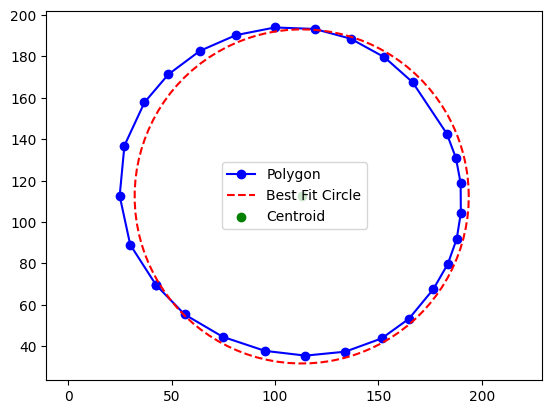

In [14]:
def mean_square_circle_error(polygon, center, radius):
    total_error = 0
    for point in polygon:
        dist = np.linalg.norm(point - center)
        error = (dist - radius) ** 2
        total_error += error
    mse = total_error / len(polygon)
    return mse

def best_fit_circle(polygon):
    # Convert polygon to numpy array for easier manipulation
    polygon = np.array(polygon)
    
    # Calculate the centroid of the polygon
    centroid = np.mean(polygon, axis=0)
    
    # Calculate the radius as the average distance from the centroid to the polygon vertices
    distances = np.linalg.norm(polygon - centroid, axis=1)
    radius = np.mean(distances)
    
    # Calculate the mean square fitting error
    mse = mean_square_circle_error(polygon, centroid, radius)
    print(f'Mean Square Fitting Error: {mse:.4f}')
    
    # Create circle for plotting
    theta = np.linspace(0, 2 * np.pi, 100)
    circle_x = centroid[0] + radius * np.cos(theta)
    circle_y = centroid[1] + radius * np.sin(theta)
    
    # Plot the polygon and the best fit circle
    plt.figure()
    plt.plot(*polygon.T, 'bo-', label='Polygon')
    plt.plot(circle_x, circle_y, 'r--', label='Best Fit Circle')
    plt.scatter(*centroid, color='green', zorder=5, label='Centroid')
    plt.legend()
    plt.axis('equal')
    plt.show()

# Example polygon vertices
polygon = unique_cycles[0]

best_fit_circle(polygon)
